## Pandas GroupBy Operations

### Understanding GroupBy objects

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv("titanic.csv")

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [ ]:
titanic.tail()

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [5]:
titanic_slice = titanic.iloc[:10, [2,3]]

In [6]:
titanic_slice

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [7]:
titanic_slice.groupby("sex")

In [8]:
gbo = titanic_slice.groupby("sex")

In [9]:
type(gbo)

pandas.core.groupby.generic.DataFrameGroupBy

In [10]:
gbo.groups

{'female': [1, 2, 3, 8, 9], 'male': [0, 4, 5, 6, 7]}

In [11]:
l = list(gbo)

In [12]:
l

[('female',
        sex   age
  1  female  38.0
  2  female  26.0
  3  female  35.0
  8  female  27.0
  9  female  14.0),
 ('male',
      sex   age
  0  male  22.0
  4  male  35.0
  5  male   NaN
  6  male  54.0
  7  male   2.0)]

In [13]:
len(l)

2

In [14]:
l[0]

('female',
       sex   age
 1  female  38.0
 2  female  26.0
 3  female  35.0
 8  female  27.0
 9  female  14.0)

In [15]:
type(l[0])

tuple

In [16]:
l[0][0]

'female'

In [17]:
l[0][1]

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [18]:
type(l[0][1])

pandas.core.frame.DataFrame

In [19]:
l[1]

('male',
     sex   age
 0  male  22.0
 4  male  35.0
 5  male   NaN
 6  male  54.0
 7  male   2.0)

In [20]:
titanic_slice.loc[titanic_slice.sex == "female"]

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [21]:
titanic_slice_f = titanic_slice.loc[titanic_slice.sex == "female"]
titanic_slice_f

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [22]:
titanic_slice_m = titanic_slice.loc[titanic_slice.sex == "male"]
titanic_slice_m

,sex,age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


In [23]:
titanic_slice_f.equals(l[0][1])

True

In [24]:
for element in gbo:
    print(element[1])

      sex   age
1  female  38.0
2  female  26.0
3  female  35.0
8  female  27.0
9  female  14.0
    sex   age
0  male  22.0
4  male  35.0
5  male   NaN
6  male  54.0
7  male   2.0


### Splitting with many Keys

In [1]:
import pandas as pd

In [2]:
summer = pd.read_csv("datasets/summer.csv")

In [3]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [5]:
summer.Country.nunique()

147

In [6]:
split1 = summer.groupby("Country")

In [7]:
l = list(split1)
l[:2]

[('AFG',
         Year     City      Sport Discipline           Athlete Country Gender  \
  28965  2008  Beijing  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  30929  2012   London  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  
              Event   Medal  
  28965     - 58 KG  Bronze  
  30929  58 - 68 KG  Bronze  ),
 ('AHO',
         Year   City    Sport Discipline          Athlete Country Gender  \
  19323  1988  Seoul  Sailing    Sailing  BOERSMA, Jan D.     AHO    Men   
  
                       Event   Medal  
  19323  Board (Division Ii)  Silver  )]

In [8]:
len(l)

147

In [9]:
l[100][1]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5031,1928,Amsterdam,Aquatics,Swimming,"YLDEFONSO, Teofilo",PHI,Men,200M Breaststroke,Bronze
5741,1932,Los Angeles,Aquatics,Swimming,"YLDEFONSO, Teofilo",PHI,Men,200M Breaststroke,Bronze
5889,1932,Los Angeles,Athletics,Athletics,"TORIBIO, Simeon Galvez",PHI,Men,High Jump,Bronze
5922,1932,Los Angeles,Boxing,Boxing,"VILLANUEVA, Jose",PHI,Men,50.8 - 54KG (Bantamweight),Bronze
6447,1936,Berlin,Athletics,Athletics,"WHITE, Miguel S.",PHI,Men,400M Hurdles,Bronze
11005,1964,Tokyo,Boxing,Boxing,"VILLANUEVA, Anthony N.",PHI,Men,54 - 57KG (Featherweight),Silver
18513,1988,Seoul,Boxing,Boxing,"SERANTES, Leopoldo",PHI,Men,- 48KG (Light-Flyweight),Bronze
20184,1992,Barcelona,Boxing,Boxing,"VELASCO, Roel",PHI,Men,- 48KG (Light-Flyweight),Bronze
21927,1996,Atlanta,Boxing,Boxing,"VELASCO, Mansueto",PHI,Men,- 48KG (Light-Flyweight),Silver


In [10]:
split2 = summer.groupby(by = ["Country", "Gender"])

In [13]:
l2 = list(split2)
l2[:2]

[(('AFG', 'Men'),
         Year     City      Sport Discipline           Athlete Country Gender  \
  28965  2008  Beijing  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  30929  2012   London  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  
              Event   Medal  
  28965     - 58 KG  Bronze  
  30929  58 - 68 KG  Bronze  ),
 (('AHO', 'Men'),
         Year   City    Sport Discipline          Athlete Country Gender  \
  19323  1988  Seoul  Sailing    Sailing  BOERSMA, Jan D.     AHO    Men   
  
                       Event   Medal  
  19323  Board (Division Ii)  Silver  )]

In [33]:
len(l2)

236

In [ ]:
l2[104]

In [ ]:
l2[104][0]

In [ ]:
l2[104][1]

### split-apply-combine explained

In [ ]:
import pandas as pd

In [34]:
titanic = pd.read_csv("titanic.csv")

In [35]:
titanic_slice = titanic.iloc[:10, [2,3]]

In [36]:
titanic_slice

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [37]:
list(titanic_slice.groupby("sex"))[0][1]

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [ ]:
list(titanic_slice.groupby("sex"))[1][1]

In [38]:
titanic_slice.groupby("sex").mean()

,age
sex,
female,28.00
male,28.25


In [39]:
titanic.groupby("sex").survived.sum()

sex
female    233
male      109
Name: survived, dtype: int64

In [40]:
titanic.groupby("sex")[["fare", "age"]].max()

,fare,age
sex,,
female,512.3292,63.0
male,512.3292,80.0


In [41]:
new_df = titanic.groupby("sex").mean()

In [42]:
new_df

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

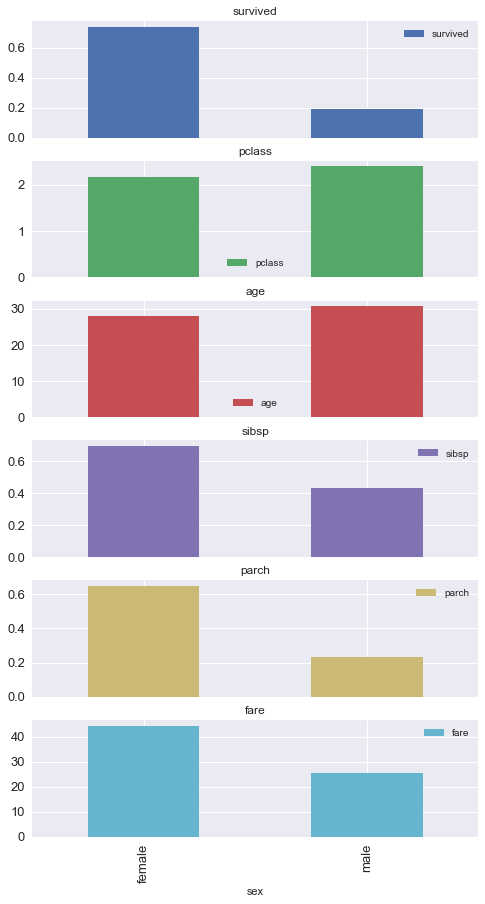

In [44]:
new_df.plot(kind = "bar", subplots = True, figsize = (8,15), fontsize = 13)
plt.show()

### split-apply-combine applied

In [ ]:
import pandas as pd

In [45]:
summer = pd.read_csv("summer.csv")

In [ ]:
summer.head()

In [ ]:
summer.info()

In [46]:
medals_per_country = summer.groupby("Country").Medal.count().nlargest(n = 20)
medals_per_country

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
GDR     825
CHN     807
JPN     788
RUS     768
CAN     649
ROU     640
NOR     554
KOR     529
POL     511
DEN     507
Name: Medal, dtype: int64

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

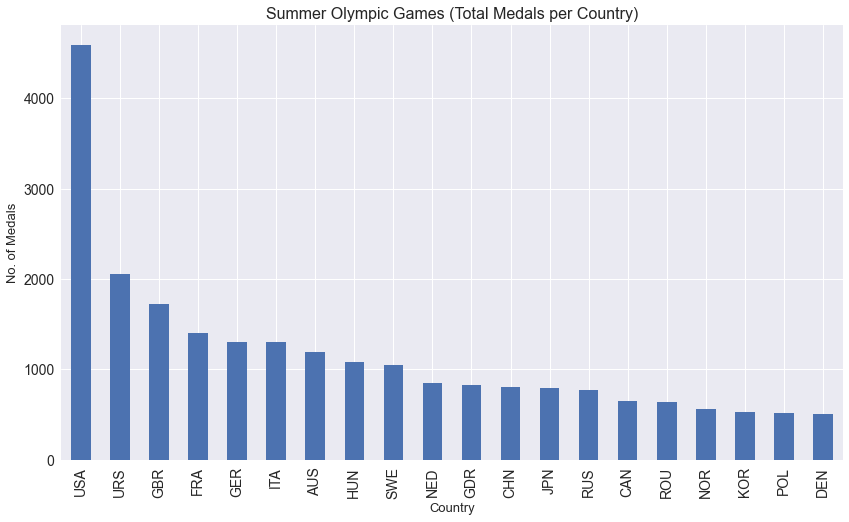

In [48]:
medals_per_country.plot(kind = "bar", figsize = (14, 8), fontsize = 14)
plt.xlabel("Country", fontsize = 13)
plt.ylabel("No. of Medals", fontsize = 13)
plt.title("Summer Olympic Games (Total Medals per Country)", fontsize = 16)
plt.show()

In [49]:
titanic = pd.read_csv("titanic.csv")

In [ ]:
titanic.head()

In [ ]:
titanic.info()

In [ ]:
titanic.describe()

In [50]:
titanic.fare.mean()

32.204207968574636

In [51]:
titanic.groupby("pclass").fare.mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

In [52]:
titanic.survived.sum()

342

In [53]:
titanic.survived.mean()

0.3838383838383838

In [54]:
titanic.groupby("sex").survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [55]:
titanic.groupby("pclass").survived.mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [56]:
titanic["ad_chi"] = "adult"

In [57]:
titanic.loc[titanic.age < 18, "ad_chi"] = "child"

In [ ]:
titanic.head(20)

In [58]:
titanic.ad_chi.value_counts()

adult    778
child    113
Name: ad_chi, dtype: int64

In [59]:
titanic.groupby("ad_chi").survived.mean()

ad_chi
adult    0.361183
child    0.539823
Name: survived, dtype: float64

In [60]:
titanic.groupby(["sex", "ad_chi"]).survived.count()

sex     ad_chi
female  adult     259
        child      55
male    adult     519
        child      58
Name: survived, dtype: int64

In [61]:
titanic.groupby(["sex", "ad_chi"]).survived.mean().sort_values(ascending = False)

sex     ad_chi
female  adult     0.752896
        child     0.690909
male    child     0.396552
        adult     0.165703
Name: survived, dtype: float64

In [62]:
w_and_c_first = titanic.groupby(["sex", "ad_chi"]).survived.mean().sort_values(ascending = False)

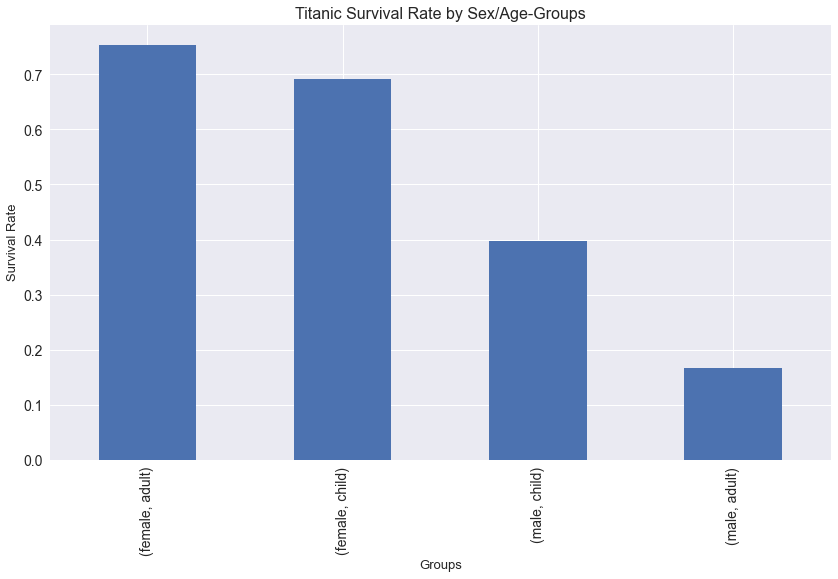

In [63]:
w_and_c_first.plot(kind = "bar", figsize = (14,8), fontsize = 14)
plt.xlabel("Groups", fontsize = 13)
plt.ylabel("Survival Rate", fontsize = 13)
plt.title("Titanic Survival Rate by Sex/Age-Groups", fontsize = 16)
plt.show()

### Advanced Aggregation with agg()

In [ ]:
import pandas as pd

In [64]:
titanic = pd.read_csv("titanic.csv", usecols = ["survived", "pclass", "sex", "age", "fare"])

In [ ]:
titanic.head()

In [65]:
titanic.groupby("sex").mean()

,survived,pclass,age,fare
sex,,,,
female,0.742038,2.159236,27.915709,44.479818
male,0.188908,2.389948,30.726645,25.523893


In [66]:
titanic.groupby("sex").sum()

,survived,pclass,age,fare
sex,,,,
female,233,678,7286.00,13966.6628
male,109,1379,13919.17,14727.2865


In [67]:
titanic.groupby("sex").agg(["mean", "sum", "min", "max"])

survived                 pclass                      age            \
            mean  sum min max      mean   sum min max       mean       sum   
sex                                                                          
female  0.742038  233   0   1  2.159236   678   1   3  27.915709   7286.00   
male    0.188908  109   0   1  2.389948  1379   1   3  30.726645  13919.17   

                         fare                              
         min   max       mean         sum   min       max  
sex                                                        
female  0.75  63.0  44.479818  13966.6628  6.75  512.3292  
male    0.42  80.0  25.523893  14727.2865  0.00  512.3292

In [68]:
titanic.groupby("sex").agg({"survived": ["sum", "mean"], "pclass": "mean", "age": ["mean", "median"], "fare": "max"})

survived              pclass        age             fare
            sum      mean      mean       mean median       max
sex                                                            
female      233  0.742038  2.159236  27.915709   27.0  512.3292
male        109  0.188908  2.389948  30.726645   29.0  512.3292

### GroupBy Aggregation with Relabeling (new in Version 0.25)

In [ ]:
import pandas as pd

In [70]:
titanic = pd.read_csv("titanic.csv", usecols = ["survived", "pclass", "sex", "age", "fare"])

In [ ]:
titanic.head()

In [71]:
titanic.groupby("sex").survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [72]:
titanic.groupby("sex").agg(survival_rate = ("survived", "mean"))

,survival_rate
sex,
female,0.742038
male,0.188908


In [73]:
titanic.groupby("sex").agg({"survived": ["sum", "mean"], "age": ["mean"]})

survived                  age
            sum      mean       mean
sex                                 
female      233  0.742038  27.915709
male        109  0.188908  30.726645

In [74]:
titanic.groupby("sex").agg(survived_total = ("survived", "sum"), 
                           survival_rate = ("survived", "mean"), mean_age = ("age", "mean"))

,survived_total,survival_rate,mean_age
sex,,,
female,233,0.742038,27.915709
male,109,0.188908,30.726645


### Transformation with transform()

In [ ]:
import pandas as pd

In [75]:
titanic = pd.read_csv("titanic.csv")

In [ ]:
titanic.head()

In [76]:
titanic.groupby(["sex", "pclass"]).survived.transform("mean")

0      0.135447
1      0.968085
2      0.500000
3      0.968085
4      0.135447
         ...   
886    0.157407
887    0.968085
888    0.500000
889    0.368852
890    0.135447
Name: survived, Length: 891, dtype: float64

In [77]:
titanic["group_surv_rate"] = titanic.groupby(["sex", "pclass"]).survived.transform("mean")

In [78]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,group_surv_rate
0,0,3,male,22.0,1,0,7.2500,S,NaN,0.135447
1,1,1,female,38.0,1,0,71.2833,C,C,0.968085
2,1,3,female,26.0,0,0,7.9250,S,NaN,0.500000
3,1,1,female,35.0,1,0,53.1000,S,C,0.968085
4,0,3,male,35.0,0,0,8.0500,S,NaN,0.135447


In [ ]:
titanic["outliers"] = abs(titanic.survived-titanic.group_surv_rate)

In [ ]:
titanic[titanic.outliers > 0.85]

### Replacing NA Values by group-specific Values

In [ ]:
import pandas as pd

In [79]:
titanic = pd.read_csv("titanic.csv")

In [ ]:
titanic.head(20)

In [80]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [81]:
mean_age = titanic.age.mean()
mean_age

29.69911764705882

In [82]:
titanic.age.fillna(mean_age)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [83]:
titanic.groupby(["sex", "pclass"]).age.mean()

sex     pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: age, dtype: float64

In [84]:
titanic["group_mean_age"] = titanic.groupby(["sex", "pclass"]).age.transform("mean")

In [85]:
titanic.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,group_mean_age
0,0,3,male,22.0,1,0,7.2500,S,NaN,26.507589
1,1,1,female,38.0,1,0,71.2833,C,C,34.611765
2,1,3,female,26.0,0,0,7.9250,S,NaN,21.750000
3,1,1,female,35.0,1,0,53.1000,S,C,34.611765
4,0,3,male,35.0,0,0,8.0500,S,NaN,26.507589
5,0,3,male,NaN,0,0,8.4583,Q,NaN,26.507589
6,0,1,male,54.0,0,0,51.8625,S,E,41.281386
7,0,3,male,2.0,3,1,21.0750,S,NaN,26.507589
8,1,3,female,27.0,0,2,11.1333,S,NaN,21.750000
9,1,2,female,14.0,1,0,30.0708,C,NaN,28.722973


In [87]:
titanic.age.fillna(titanic.group_mean_age, inplace = True)

In [88]:
titanic.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,group_mean_age
0,0,3,male,22.000000,1,0,7.2500,S,NaN,26.507589
1,1,1,female,38.000000,1,0,71.2833,C,C,34.611765
2,1,3,female,26.000000,0,0,7.9250,S,NaN,21.750000
3,1,1,female,35.000000,1,0,53.1000,S,C,34.611765
4,0,3,male,35.000000,0,0,8.0500,S,NaN,26.507589
5,0,3,male,26.507589,0,0,8.4583,Q,NaN,26.507589
6,0,1,male,54.000000,0,0,51.8625,S,E,41.281386
7,0,3,male,2.000000,3,1,21.0750,S,NaN,26.507589
8,1,3,female,27.000000,0,2,11.1333,S,NaN,21.750000
9,1,2,female,14.000000,1,0,30.0708,C,NaN,28.722973


In [89]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   survived        891 non-null    int64  
 1   pclass          891 non-null    int64  
 2   sex             891 non-null    object 
 3   age             891 non-null    float64
 4   sibsp           891 non-null    int64  
 5   parch           891 non-null    int64  
 6   fare            891 non-null    float64
 7   embarked        889 non-null    object 
 8   deck            203 non-null    object 
 9   group_mean_age  891 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 69.7+ KB


### Generalizing split-apply-combine with apply()

In [ ]:
import pandas as pd

In [90]:
titanic = pd.read_csv("titanic.csv", usecols = ["survived", "pclass", "sex", "age", "fare"])

In [ ]:
titanic.head()

In [91]:
titanic.groupby("sex").mean()

,survived,pclass,age,fare
sex,,,,
female,0.742038,2.159236,27.915709,44.479818
male,0.188908,2.389948,30.726645,25.523893


In [92]:
female_group = list(titanic.groupby("sex"))[0][1]
female_group

,survived,pclass,sex,age,fare
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
8,1,3,female,27.0,11.1333
9,1,2,female,14.0,30.0708
...,...,...,...,...,...
880,1,2,female,25.0,26.0000
882,0,3,female,22.0,10.5167
885,0,3,female,39.0,29.1250
887,1,1,female,19.0,30.0000


In [93]:
female_group.mean().astype("float")

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_19564/2434558135.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  female_group.mean().astype("float")


survived     0.742038
pclass       2.159236
age         27.915709
fare        44.479818
dtype: float64

In [94]:
def group_mean(group):
    return group.mean()

In [95]:
group_mean(female_group)

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_19564/359042690.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return group.mean()


survived     0.742038
pclass       2.159236
age         27.915709
fare        44.479818
dtype: float64

In [96]:
titanic.groupby("sex").apply(group_mean)

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_19564/359042690.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return group.mean()


,survived,pclass,age,fare
sex,,,,
female,0.742038,2.159236,27.915709,44.479818
male,0.188908,2.389948,30.726645,25.523893


In [97]:
titanic.nlargest(5, "age")

,survived,pclass,sex,age,fare
630,1,1,male,80.0,30.0000
851,0,3,male,74.0,7.7750
96,0,1,male,71.0,34.6542
493,0,1,male,71.0,49.5042
116,0,3,male,70.5,7.7500


In [ ]:
def five_oldest_surv(group):
    return group[group.survived == 1].nlargest(5, "age")

In [ ]:
titanic.groupby("sex").apply(five_oldest_surv)

### Hierarchical Indexing (MultiIndex) with Groupby

In [ ]:
import pandas as pd

In [98]:
titanic = pd.read_csv("titanic.csv", usecols = ["survived", "pclass", "sex", "age", "fare"])

In [ ]:
titanic

In [99]:
summary = titanic.groupby(["sex", "pclass"]).mean()

In [100]:
summary

survived        age        fare
sex    pclass                                 
female 1       0.968085  34.611765  106.125798
       2       0.921053  28.722973   21.970121
       3       0.500000  21.750000   16.118810
male   1       0.368852  41.281386   67.226127
       2       0.157407  30.740707   19.741782
       3       0.135447  26.507589   12.661633

In [101]:
summary.index

MultiIndex([('female', 1),
            ('female', 2),
            ('female', 3),
            (  'male', 1),
            (  'male', 2),
            (  'male', 3)],
           names=['sex', 'pclass'])

In [102]:
summary.loc[("female", 2), :]

survived     0.921053
age         28.722973
fare        21.970121
Name: (female, 2), dtype: float64

In [ ]:
summary.loc[("female", 2), "age"]

In [103]:
summary.swaplevel().sort_index()

survived        age        fare
pclass sex                                    
1      female  0.968085  34.611765  106.125798
       male    0.368852  41.281386   67.226127
2      female  0.921053  28.722973   21.970121
       male    0.157407  30.740707   19.741782
3      female  0.500000  21.750000   16.118810
       male    0.135447  26.507589   12.661633

In [104]:
summary.reset_index()

,sex,pclass,survived,age,fare
0,female,1,0.968085,34.611765,106.125798
1,female,2,0.921053,28.722973,21.970121
2,female,3,0.500000,21.750000,16.118810
3,male,1,0.368852,41.281386,67.226127
4,male,2,0.157407,30.740707,19.741782
5,male,3,0.135447,26.507589,12.661633


### stack() and unstack()

In [ ]:
import pandas as pd

In [105]:
summer = pd.read_csv("summer.csv")

In [ ]:
summer.head()

In [106]:
medals_by_country = summer.groupby(["Country", "Medal"]).Medal.count()

In [107]:
medals_by_country

Country  Medal 
AFG      Bronze     2
AHO      Silver     1
ALG      Bronze     8
         Gold       5
         Silver     2
                   ..
ZIM      Gold      18
         Silver     4
ZZX      Bronze    10
         Gold      23
         Silver    15
Name: Medal, Length: 347, dtype: int64

In [108]:
medals_by_country.loc[("USA", "Gold")]

2235

In [111]:
medals_by_country.shape

(347,)

In [112]:
medals_by_country.unstack(level = -1)

Medal,Bronze,Gold,Silver
Country,,,
AFG,2.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,5.0,2.0
ANZ,5.0,20.0,4.0
ARG,91.0,69.0,99.0
...,...,...,...
VIE,NaN,NaN,2.0
YUG,118.0,143.0,174.0
ZAM,1.0,NaN,1.0


In [113]:
medals_by_country = medals_by_country.unstack(level = -1, fill_value= 0)

In [ ]:
medals_by_country.head()

In [114]:
medals_by_country.shape

(147, 3)

In [115]:
medals_by_country = medals_by_country[["Gold", "Silver", "Bronze"]]

In [116]:
medals_by_country.sort_values(by = ["Gold", "Silver", "Bronze"], ascending = [False, False, False], inplace = True)

In [117]:
medals_by_country.head(10)

Medal,Gold,Silver,Bronze
Country,,,
USA,2235,1252,1098
URS,838,627,584
GBR,546,621,553
ITA,476,416,404
GER,452,378,475
HUN,412,316,351
FRA,408,491,497
SWE,349,367,328
GDR,329,271,225


In [118]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

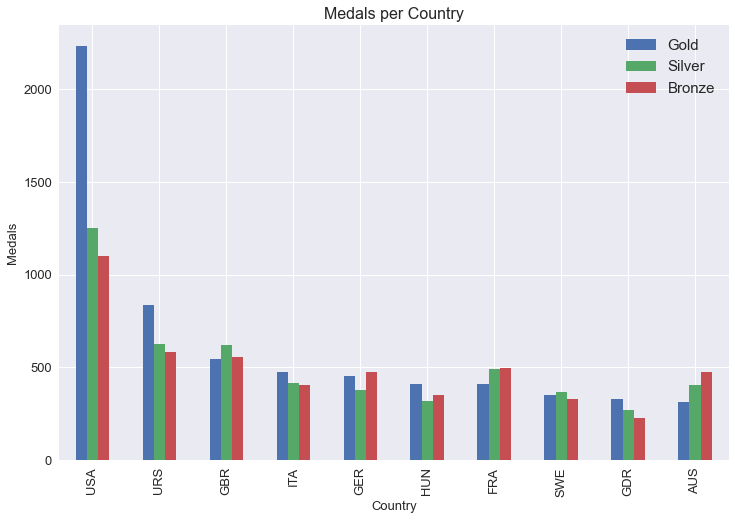

In [119]:
medals_by_country.head(10).plot(kind = "bar", figsize = (12,8), fontsize = 13)
plt.xlabel("Country", fontsize = 13)
plt.ylabel("Medals", fontsize = 13)
plt.title("Medals per Country", fontsize = 16)
plt.legend(fontsize = 15)
plt.show()

In [121]:
medals_by_country.stack().unstack()

Country  Medal 
USA      Gold      2235
         Silver    1252
         Bronze    1098
URS      Gold       838
         Silver     627
                   ... 
NIG      Silver       0
         Bronze       1
TOG      Gold         0
         Silver       0
         Bronze       1
Length: 441, dtype: int64